In [2]:
import numpy as np
import random

In [3]:
def read_graph_from_file(file_name):
    f = open(file_name, "r")
    n = int(f.readline())
    matrix = []
    for i in range(n):
        matrix.append([])
        line = f.readline()
        elements = line.split(",")
        for j in range(n):
            matrix[-1].append(int(elements[j]))
    no_edges = 0
    for i in range(n):
        for j in range(n):
            if matrix[i][j] != 0:
                if j > i:
                    no_edges += 1
            else:
                matrix[i][j] = 9999999999999
    graph = {'noNodes': n,
             'matrix': matrix,
             'noEdges': no_edges,
             'source': int(f.readline()),
             'destination': int(f.readline())}
    f.close()
    return graph['matrix']

In [4]:
import math
def read_from_tsp(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
        node_coordinates = []
        for line in lines:
            if line.startswith('EOF'):
                break
            if line.startswith(('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')):
                parts = line.split()
                x = float(parts[1])
                y = float(parts[2])
                node_coordinates.append((x, y))

    n = len(node_coordinates)
    dist_matrix = [[0] * n for _ in range(n)]
    for i in range(n):
        for j in range(i+1, n):
            dist = math.sqrt((node_coordinates[i][0] - node_coordinates[j][0])**2 +
                             (node_coordinates[i][1] - node_coordinates[j][1])**2)
            dist_matrix[i][j] = dist
            dist_matrix[j][i] = dist
    return dist_matrix

In [5]:
def aco(matrix, num_ants=50, iterations=100, alpha=1, beta=5, rho=0.1, q=100):
    distances = np.array(matrix)
    num_cities = distances.shape[0]

    pheromone = np.ones((num_cities, num_cities))

    best_tour = None
    best_tour_length = -1

    bests = []
    worsts = []
    avg = []

    for i in range(iterations):
        ant_tours = np.zeros((num_ants, num_cities), dtype=int)

        for ant in range(num_ants):
            ant_tours[ant, 0] = random.randint(0, num_cities - 1)

        for j in range(1, num_cities):
            for ant in range(num_ants):
                current_city = ant_tours[ant, j - 1]
                avb_cities = np.delete(np.arange(num_cities), ant_tours[ant, :j])

                probabilities = np.zeros(num_cities - j)

                for k, city in enumerate(avb_cities):
                    probabilities[k] = (pheromone[current_city, city] ** alpha) * ((1.0 / distances[current_city, city]) ** beta)

                probabilities /= probabilities.sum()

                next_city = np.random.choice(avb_cities, p=probabilities)
                ant_tours[ant, j] = next_city

        tour_lengths = np.zeros(num_ants)
        for ant in range(num_ants):
            tour = ant_tours[ant]
            tour_length = 0
            for j in range(num_cities - 1):
                tour_length += distances[tour[j], tour[j+1]]
            tour_length += distances[tour[-1], tour[0]]
            tour_lengths[ant] = tour_length

        delta_pheromone = np.zeros((num_cities, num_cities))
        for ant in range(num_ants):
            for j in range(num_cities - 1):
                delta_pheromone[ant_tours[ant, j], ant_tours[ant, j + 1]] += q / tour_lengths[ant]
            delta_pheromone[ant_tours[ant, -1], ant_tours[ant, 0]] += q / tour_lengths[ant]

        pheromone = (1 - rho) * pheromone + rho * delta_pheromone

        best_tour_length = np.min(tour_lengths)
        bests.append(best_tour_length)
        worsts.append(np.max(tour_lengths))
        avg.append(np.mean(tour_lengths))

        best_tour = ant_tours[np.argmin(tour_lengths)]

    return best_tour, best_tour_length, bests, worsts, avg


In [6]:
import matplotlib.pyplot as plt
def plot_result(bests_val, worsts_val, avg_val):
    points = [i for i in range(len(bests_val))]
    plt.plot(points, bests_val, label="Best")
    plt.plot(points, worsts_val, label="Worsts")
    plt.plot(points, avg_val, label="Average")
    plt.legend()
    plt.show()

In [7]:
graph = read_from_tsp("data/berlin52.tsp")

7981.225345949063


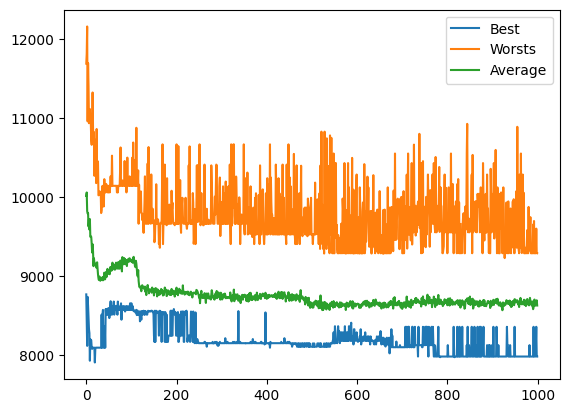

In [8]:
b1, b2, bests, worsts, avg = aco(graph, 100, 1000, 2, 7, 0.2, 100)
print(b2)
# print(b1)
plot_result(bests, worsts, avg)